<a href="https://colab.research.google.com/github/Leenasmk3/IT326-DataMining-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problem:
The sinking of the RMS Titanic in 1912 resulted in over 1,500 deaths, raising critical questions about what factors determined passenger survival. This project aims to predict whether a Titanic passenger survived based on demographic and socioeconomic features such as age, gender, passenger class, fare, family size, and port of embarkation. We also seek to discover hidden patterns by clustering passengers into meaningful groups based on their characteristics. This problem is important because it provides insights into how social hierarchies and demographics influenced survival during emergencies, demonstrates practical applications of machine learning in historical analysis, and helps identify survival patterns that can inform modern disaster response planning and risk assessment strategies. Understanding these factors not only reveals historical biases but also showcases how data mining techniques can extract actionable insights from real-world datasets to support better decision-making in emergency situations.

#2. Data Mining Task:
In our project, we will use two data mining tasks to help us predict the survival of Titanic passengers: classification and clustering.

For classification, we will train our model to classify whether a passenger survived or not using the (Survived) class label based on a set of passenger characteristics such as passenger class (Pclass), gender (Sex), age (Age), number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), ticket fare (Fare), port of embarkation (Embarked), and other relevant features. The model will learn patterns from labeled historical data where the survival outcome is known, enabling it to predict survival for new passenger records.

For clustering, our model will create a set of clusters grouping passengers who have similar characteristics such as social class, family size, age groups, and fare ranges. These clusters will help identify distinct passenger segments with common attributes and survival patterns. By analyzing these natural groupings, we can discover hidden relationships in the data and understand which passenger profiles were more likely to survive. The identified clusters can then be used to predict survival outcomes for new passengers based on which cluster they belong to, enhancing our understanding of the survival patterns.

#3. Data:
1- Data Selection
 • Number of rows: 891
 • Number of columns: 12

Main observations about the raw dataset:
 • The dataset contains many missing values, especially in:
 • Age
 • Cabin
 • Embarked

  There are noticeable outliers in:
 • Age
 • Fare

The dataset is imbalanced, as most passengers did not survive




2- Data Preprocessing

several preprocessing techniques were applied, such as:
 • Removing unimportant or non-useful columns
 • Handling missing values
 • Modifying and preparing some features for analysis and modeling

After preprocessing:
 • Number of rows: 621
 • Number of columns: 10

After cleaning and preprocessing, the dataset became ready for use and for building the model in the next phase.

#4. Data preprocessing:

The following preprocessing tasks were applied to clean the data, remove noise, and prepare it for modeling:

A. Handling Missing Values
Missing values in Cabin, Age, and Embarked were addressed:
 * Cabin column: This column was dropped. Reason: It contained a very high percentage of missing data (approximately 77.10%), making it unsuitable for reliable imputation or use.
 * Embarked column: The missing values (0.22%) were imputed using the Mode (the most frequent value) of the column.
 * Age column: The missing values (19.87%) were imputed using the Median of the column.

B. Variable Transformation and Discretization
 * Fare Transformation:
   * A logarithmic transformation  was applied to the Fare feature to create a new feature, Fare_log. Reason: The feature was heavily right-skewed  and the logarithmic transformation helps to reduce this skewness and make the distribution closer to normal.
   * The original Fare column was then dropped.
 * Age Discretization:
   * The continuous Age values were discretized into five age categories (Child, Teen, YoungAdult, Adult, Senior).

C. Outlier Removal
The Interquartile Range (IQR Method) was used to remove outliers (noise) from the numerical attributes (Age, Fare_log, SibSp, Parch). To ensure that extreme values do not negatively affect the accuracy of the mathematical models.

D. Scaling and Encoding
 * Normalization (Min-Max Normalization):
   * MinMaxScaler was applied to the processed numerical attributes (Age, Fare_log, SibSp, Parch). To unify the range of these features between 0 and 1, preventing features with larger initial values from dominating the distance-based models.
 * Categorical Variable Encoding:
   * The Sex and Age_bin features were encoded using LabelEncoder.
   * The Embarked feature was encoded using One-Hot Encoding.
 * Column Cleaning: Irrelevant columns (PassengerId, Name, Ticket) were dropped.

E. Feature Selection
 * The ANOVA F-test using SelectKBest was employed to identify the top 5 features correlated with the target variable Survived.
 * Selected Features: Sex, Pclass, Fare_log, SibSp, and Embarked_S.

#5. Data Mining Technique:
We will apply two main data mining techniques to the Titanic dataset: Classification and Clustering.

For **classification**, we will use Decision Tree Classifier from
( *sklearn.tree.DecisionTreeClassifier* ) with both Gini index and entropy as splitting criteria to predict passenger survival outcomes. We will split the data using train_test_split from ( *sklearn.model_selection* ) into three different partitions (**70-30, 80-20, and 60-40**) to evaluate model robustness. For each partition and criterion, we will assess performance using accuracy_score and confusion_matrix from
 ( *sklearn.metrics* ). We will visualize the decision tree structure using (*plot_tree with matplotlib.pyplot*) to identify the most influential features for survival prediction.
<br>
<br>
For **clustering**, we will apply K-Means from ( *sklearn.cluster.KMeans* ) to discover natural groupings among passengers. First, we will preprocess the data by removing the target variable, converting boolean columns to integers, and applying StandardScaler from<br> (*sklearn.preprocessing*) to normalize all features. We will test three different K values **(3, 4, and 5)** with parameters random_state=42, n_init=5, and max_iter=300. To determine the optimal number of clusters, we will use the Elbow Method by plotting Within-Cluster Sum of Squares, calculate silhouette_score from(*sklearn.metrics*)  for each K value, and create visual plots using (*matplotlib.pyplot*) showing Age versus Fare_log with color-coded cluster assignments. Based on the majority rule combining all evaluation metrics, we will select the best K value.

#6. Evaluation and Comparison:

**- Classification:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/Leenasmk3/IT326-DataMining-Project/main/Dataset/Preprocessed_dataset.csv")
display(df)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_log,Age_bin,Embarked_Q,Embarked_S
0,0,3,1,0.346939,0.5,0.0,0.133008,3,False,True
1,1,1,0,0.673469,0.5,0.0,0.712356,3,False,False
2,1,3,0,0.428571,0.0,0.0,0.154000,3,False,True
3,1,1,0,0.612245,0.5,0.0,0.635010,3,False,True
4,0,3,1,0.612245,0.0,0.0,0.157713,3,False,True
...,...,...,...,...,...,...,...,...,...,...
615,0,3,1,0.408163,0.0,0.0,0.126457,3,False,True
616,0,2,1,0.448980,0.0,0.0,0.274174,3,False,True
617,1,1,0,0.285714,0.0,0.0,0.486368,2,False,True
618,1,1,1,0.428571,0.0,0.0,0.486368,3,False,False


In [ ]:
df_copy = df.copy()

# Define the features (X) and target variable (y)
X = df_copy.drop(['Survived'], axis=1)   # Independent features
y = df_copy['Survived']


separated the independent variables (X) and the dependent variable (y). The independent variables (`X`) include features like `Age`, `Fare`, `Pclass`, etc. The dependent variable (`y`) is the column `Survived`, which indicates whether the passenger survived or not.


In [ ]:
# 1. Split data into 70% training and 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
model_70 = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_70.fit(X_train_70, y_train_70)

# Make predictions on the test data
y_pred_70 = model_70.predict(X_test_30)


accuracy_70 = accuracy_score(y_test_30, y_pred_70)
print(f'Accuracy (70% training, 30% testing): {accuracy_70}')

Accuracy (70% training, 30% testing): 0.7795698924731183


split the data into training and testing sets using the train_test_split() function. 70% of the data is used for training, and 30% is used for testing.

initialized a Decision Tree Classifier using `DecisionTreeClassifier() to training data to learn how to classify whether passengers survived or not based on the available features.

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_70 = confusion_matrix(y_test_30, y_pred_70)
print("Confusion Matrix (70% training, 30% testing):")
print(cm_70)

Confusion Matrix (70% training, 30% testing):
[[97 22]
 [19 48]]


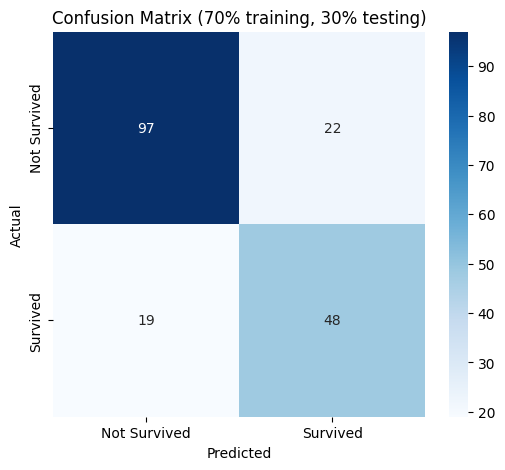

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (70% training, 30% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

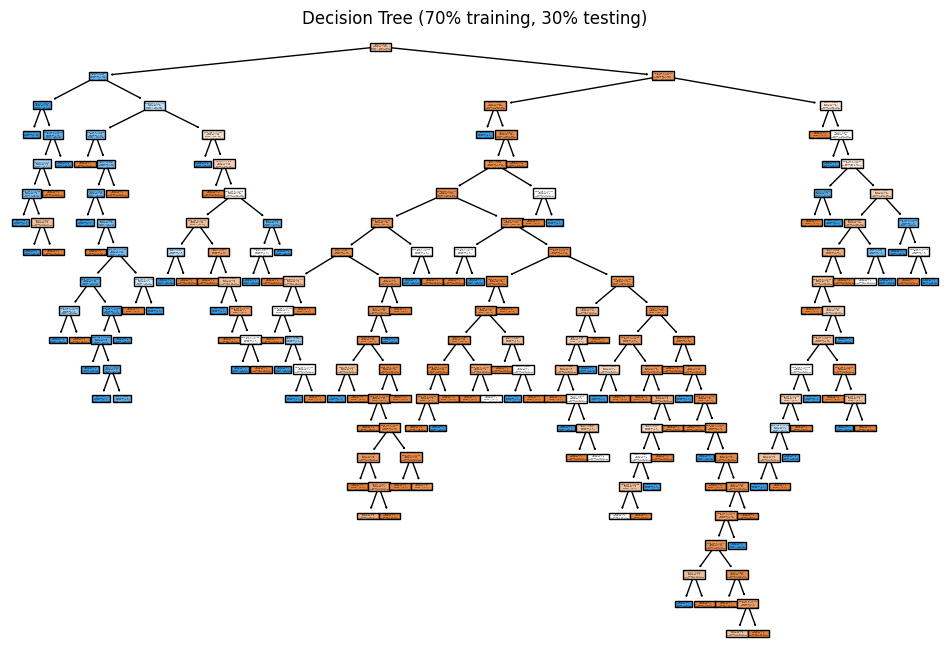

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model_70, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (70% training, 30% testing)")
plt.show()

In [ ]:
# 2. Split data into 80% training and 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model again on this new split
model_80 = DecisionTreeClassifier(random_state=42)
model_80.fit(X_train_80, y_train_80)

# Make predictions
y_pred_80 = model_80.predict(X_test_20)

accuracy_80 = accuracy_score(y_test_20, y_pred_80)
print(f'Accuracy (80% training, 20% testing): {accuracy_80}')

Accuracy (80% training, 20% testing): 0.7419354838709677


In [ ]:
cm_80 = confusion_matrix(y_test_20, y_pred_80)
print("Confusion Matrix (80% training, 20% testing):")
print(cm_80)

Confusion Matrix (80% training, 20% testing):
[[59 18]
 [14 33]]


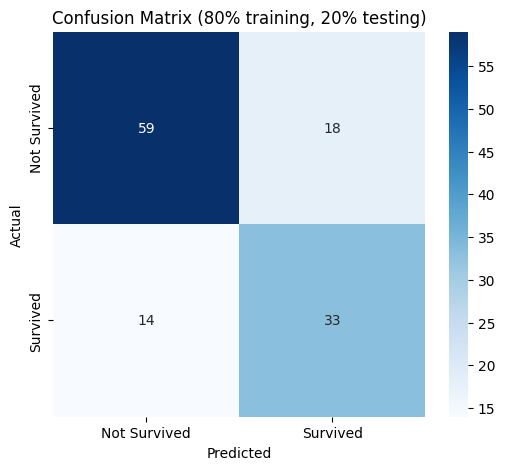

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (80% training, 20% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

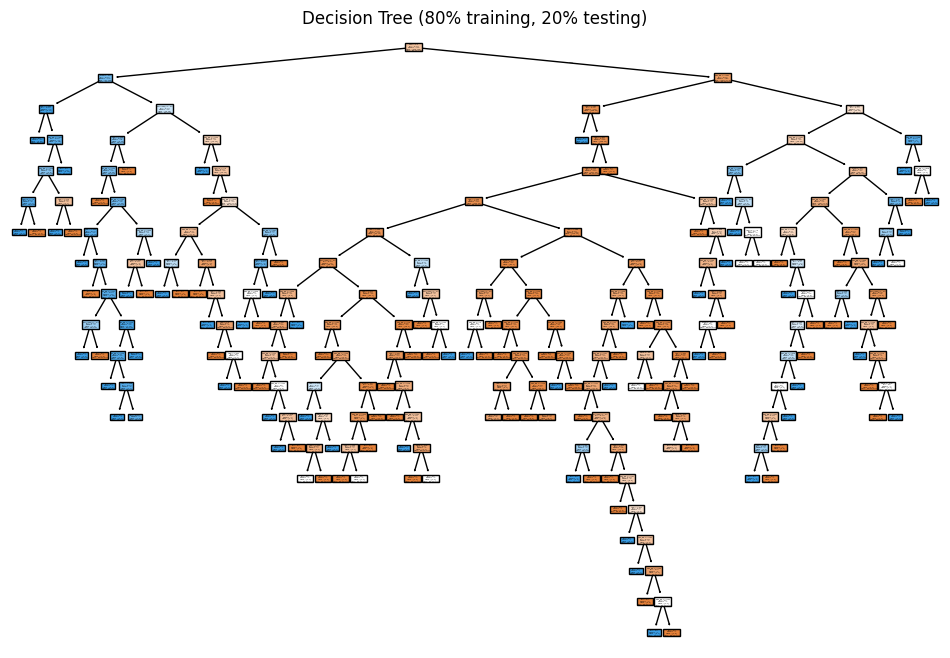

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model_80, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (80% training, 20% testing)")
plt.show()

In [ ]:
# 3. Split data into 60% training and 40% testing
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)
model_60 = DecisionTreeClassifier(random_state=42)
model_60.fit(X_train_60, y_train_60)
y_pred_60 = model_60.predict(X_test_40)
accuracy_60 = accuracy_score(y_test_40, y_pred_60)
print(f'Accuracy (60% training, 40% testing): {accuracy_60}')

Accuracy (60% training, 40% testing): 0.7661290322580645


In [ ]:
cm_60 = confusion_matrix(y_test_40, y_pred_60)
print("Confusion Matrix (60% training, 40% testing):")
print(cm_60)

Confusion Matrix (60% training, 40% testing):
[[131  27]
 [ 31  59]]


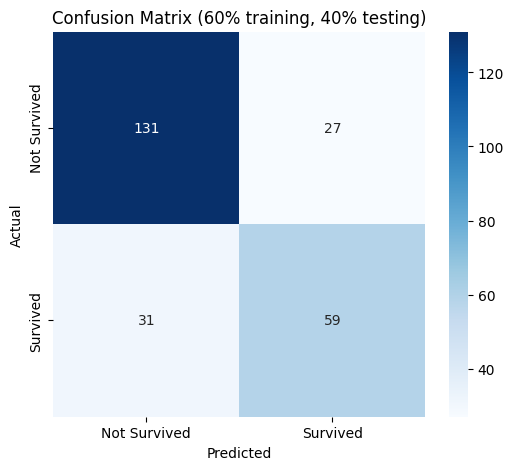

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_60, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (60% training, 40% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

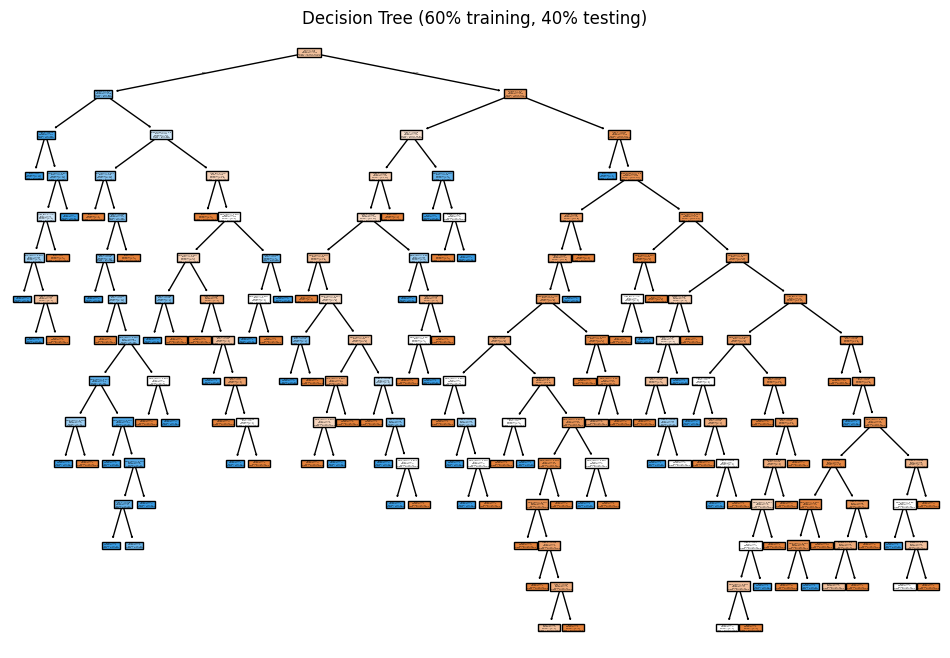

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model_60, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (60% training, 40% testing)")
plt.show()

**- Clustering:**

In [ ]:
# Drop label (Survived) from clustering features
X = df.drop(columns=["Survived"])
# Convert boolean columns to int
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(int)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape after dropping Survived:", X_scaled.shape)

Shape after dropping Survived: (620, 9)


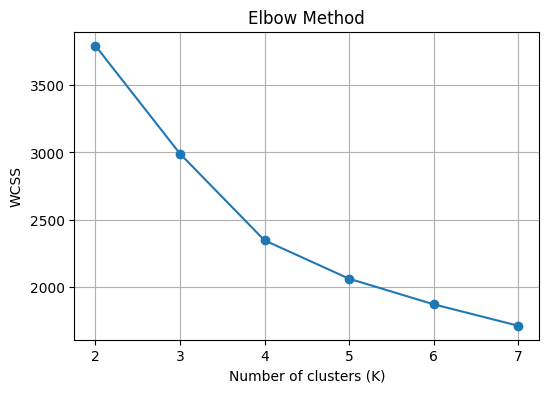

In [ ]:
# ----- Elbow Method -----
wcss = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        max_iter=200
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

The curve shows a sharp decrease between K = 2, 3, and 4, and then the improvement starts to slow down after K = 4. This indicates that the elbow point is approximately around K = 3 or K = 4. Therefore, based on the Elbow Method, I selected three candidate values for K : 3, 4, 5 for further evaluation.

In [ ]:
#  ----- K-means for the selected K values -----
#  ----- and Average Silhouette, Total within-cluster sum of square for each k -----

# candidate K values based on the Elbow plot
candidate_K = [3, 4, 5]

silhouette_scores = {}
wcss_per_k = {}
labels_per_k = {}
models_per_k = {}

for k in candidate_K:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        max_iter=200
    )
    labels = kmeans.fit_predict(X_scaled)

    # Store results
    models_per_k[k] = kmeans
    labels_per_k[k] = labels
    wcss_per_k[k] = kmeans.inertia_
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

# Print results
print("=== Results per K ===")
for k in candidate_K:
    print(f"\nK = {k}")
    print(f"  Total Within-Cluster Sum of Squares: {wcss_per_k[k]:.2f}")
    print(f"  Average Silhouette Score: {silhouette_scores[k]:.4f}")

# Select the best K based on highest Silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print("\nBest K based on Silhouette score:", best_k)


=== Results per K ===

K = 3
  Total Within-Cluster Sum of Squares: 2990.54
  Average Silhouette Score: 0.3523

K = 4
  Total Within-Cluster Sum of Squares: 2346.29
  Average Silhouette Score: 0.3846

K = 5
  Total Within-Cluster Sum of Squares: 2060.87
  Average Silhouette Score: 0.3736

Best K based on Silhouette score: 4


The optimal K based on the Silhouette score is K = 4, since it produces the highest average Silhouette value. A higher Silhouette score indicates that the clusters are more compact and better separated, making K = 4 the best choice among the evaluated options.

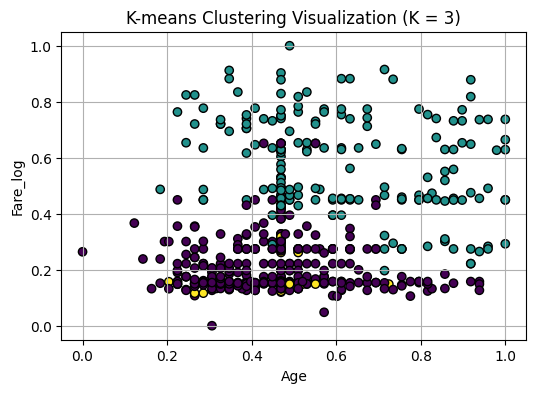

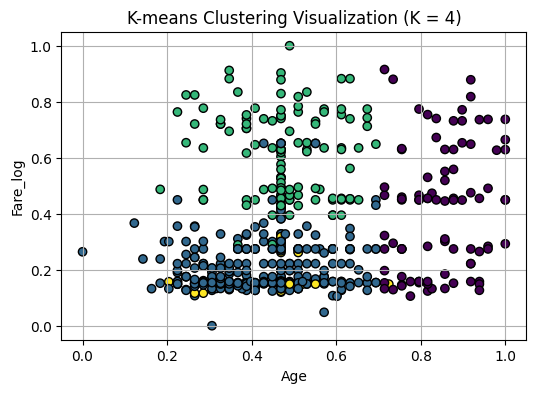

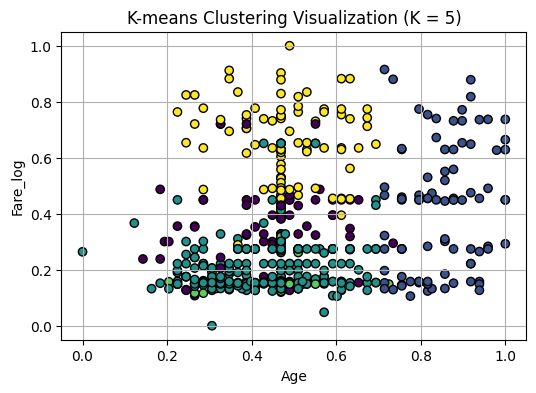

In [ ]:
# Choose two features for visualization
feature_x = "Age"
feature_y = "Fare_log"

for k in candidate_K:  # candidate_K = [3,4,5]
    labels = labels_per_k[k]

    plt.figure(figsize=(6, 4))
    plt.scatter(
        X[feature_x],
        X[feature_y],
        c=labels,
        cmap="viridis",
        edgecolor='k'
    )
    plt.title(f"K-means Clustering Visualization (K = {k})")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.show()

Based on the majority rule, K = 4 was selected as the optimal number of clusters. In the Elbow plot, K = 4 is close to the elbow point. K = 4 also has the highest average Silhouette score, which means the clusters are more compact and better separated. The visualizations for K = 4 show clearer colored groups than K = 3 and K = 5. Since the Elbow, Silhouette, and visual plots all support K = 4, we chose it as the best K.